In [9]:
import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams['font.sans-serif'] = ['M+ 1C']
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("/home/ubuntu/cur/program/Analyisis_incineration/JR_阪神_所要時間別.csv", index_col=0)
df = df.iloc[:, :3].apply(pd.to_numeric, errors="coerce")
count_cols = df.columns.tolist()
df.index = df.index.str.strip()
df.index.name = "移動時間"

jr_total = df.loc["合計", "ＪＲ西日本 元町（兵庫）"]
hanshin_total = df.loc["合計", "阪神/神戸高 元町（兵庫）"]

df["ＪＲ西日本 元町（兵庫）割合"] = (df["ＪＲ西日本 元町（兵庫）"] / jr_total).round(4)
df["阪神/神戸高 元町（兵庫）割合"] = (df["阪神/神戸高 元町（兵庫）"] / hanshin_total).round(4)
df[count_cols] = df[count_cols].astype(int)

df = df[["ＪＲ西日本 元町（兵庫）", "ＪＲ西日本 元町（兵庫）割合", "阪神/神戸高 元町（兵庫）", "阪神/神戸高 元町（兵庫）割合", "合計"]]

df.head(50)

,ＪＲ西日本 元町（兵庫）,ＪＲ西日本 元町（兵庫）割合,阪神/神戸高 元町（兵庫）,阪神/神戸高 元町（兵庫）割合,合計
移動時間,,,,,
～10分,357,0.0155,87,0.0094,444
11分～20分,1492,0.0646,955,0.1033,2447
21分～30分,3303,0.1431,1247,0.1349,4550
31分～40分,3254,0.1410,1064,0.1151,4318
41分～50分,3962,0.1717,2440,0.2639,6402
51分～60分,3481,0.1508,1349,0.1459,4830
61分～70分,2202,0.0954,1111,0.1202,3313
71分～80分,2421,0.1049,340,0.0368,2761
81分～90分,611,0.0265,247,0.0267,858


In [ ]:
df

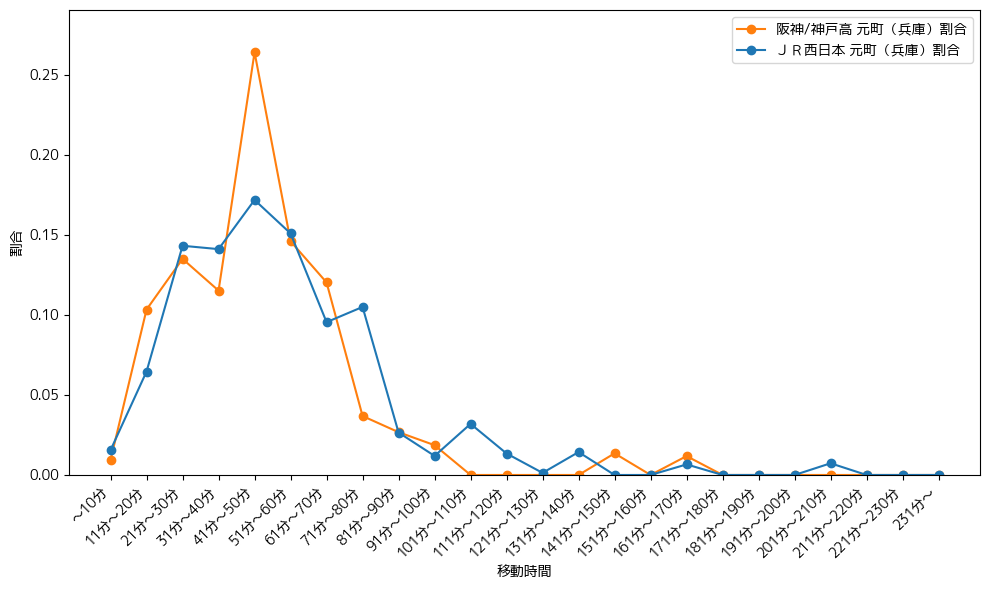

In [10]:
ratio_plot_df = df.drop("合計").reset_index()
ratio_long = ratio_plot_df.melt(id_vars="移動時間", value_vars=["ＪＲ西日本 元町（兵庫）割合", "阪神/神戸高 元町（兵庫）割合"], var_name="駅", value_name="割合")

# Plot JR West and Hanshin ratios by travel time
color_map = {
    "ＪＲ西日本 元町（兵庫）割合": "#1f77b4",
    "阪神/神戸高 元町（兵庫）割合": "#ff7f0e"
}

plt.figure(figsize=(10, 6))
for station, group in ratio_long.groupby("駅"):
    plt.plot(group["移動時間"], group["割合"], marker="o", label=station, color=color_map.get(station))

plt.xticks(rotation=45, ha="right")
plt.xlabel("移動時間")
plt.ylabel("割合")
plt.ylim(0, ratio_long["割合"].max() * 1.1)
plt.legend()
plt.tight_layout()
plt.show()